# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The NSL_SIMULATOR code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progressive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B \langle T \rangle + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

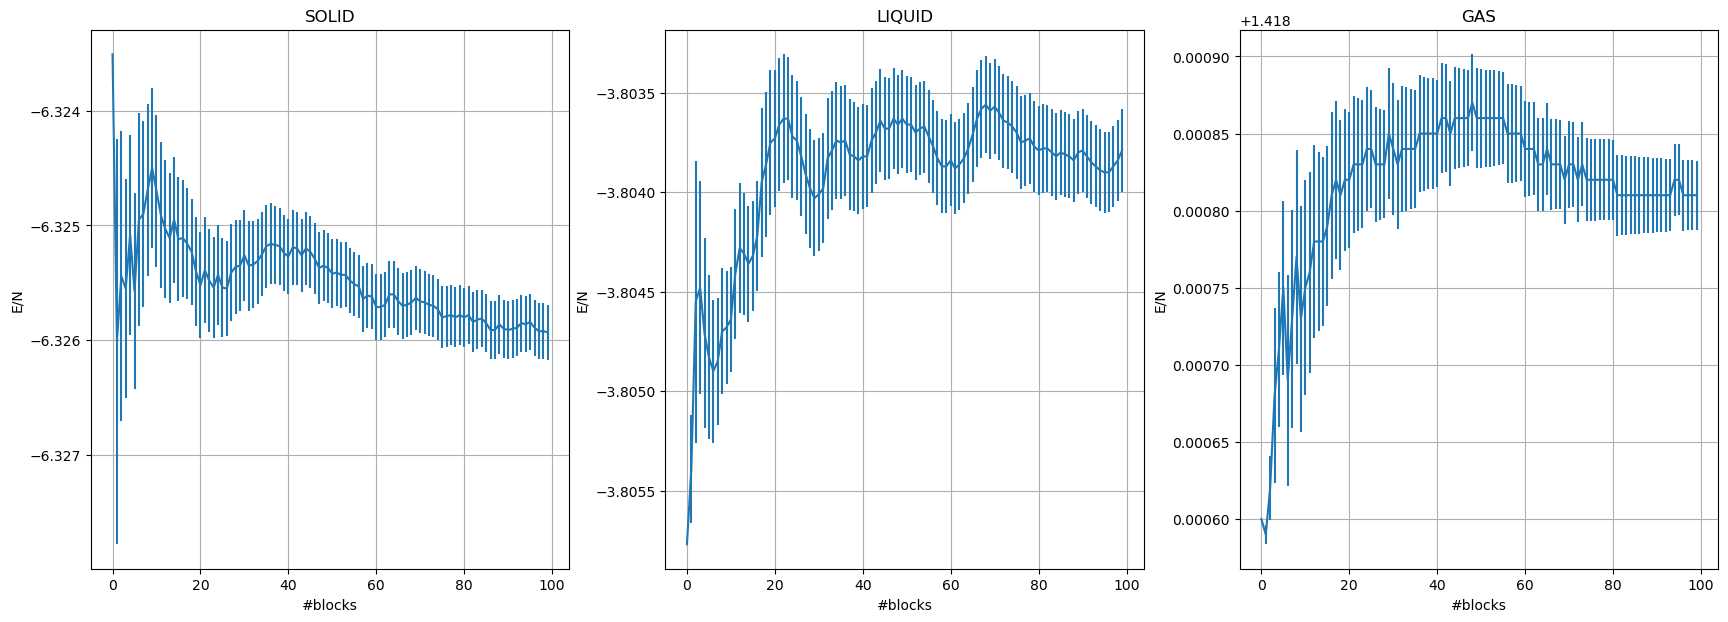

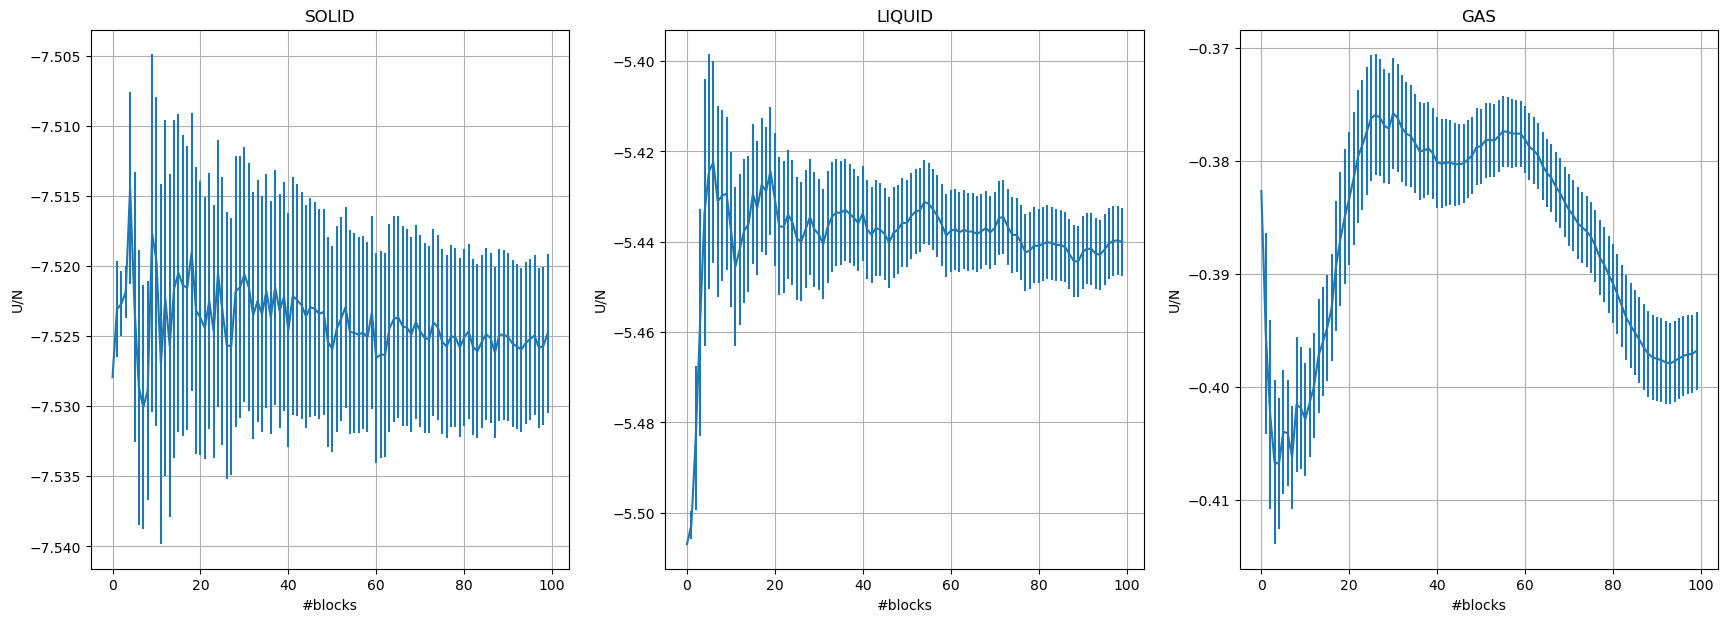

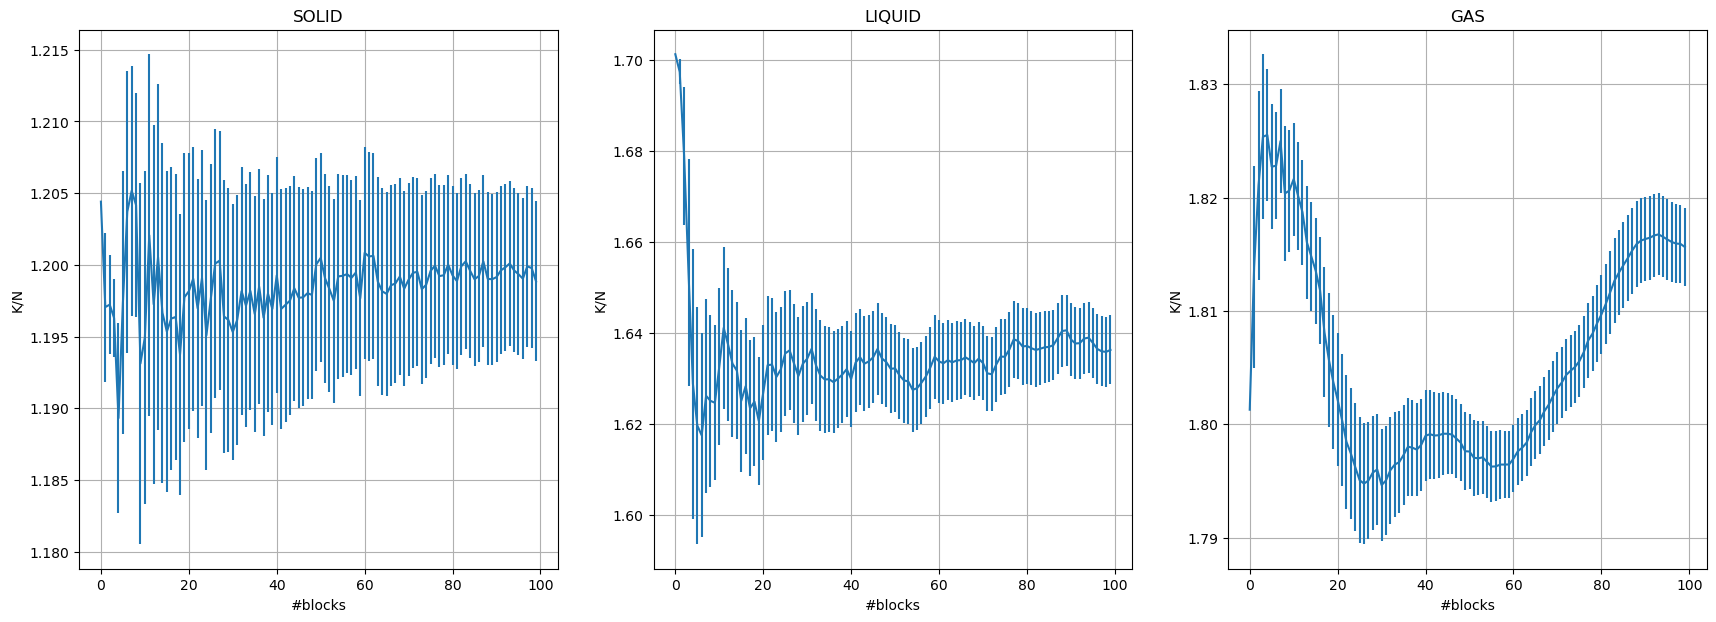

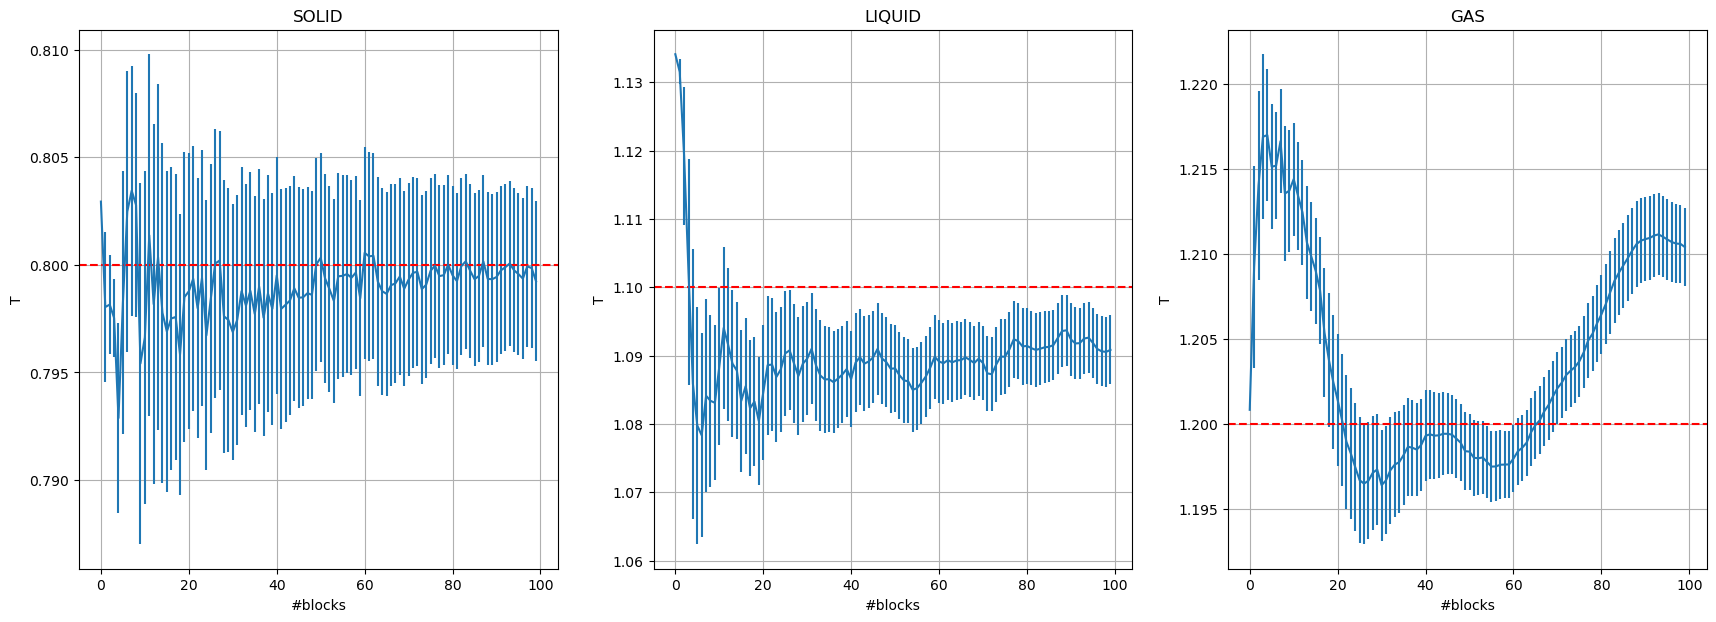

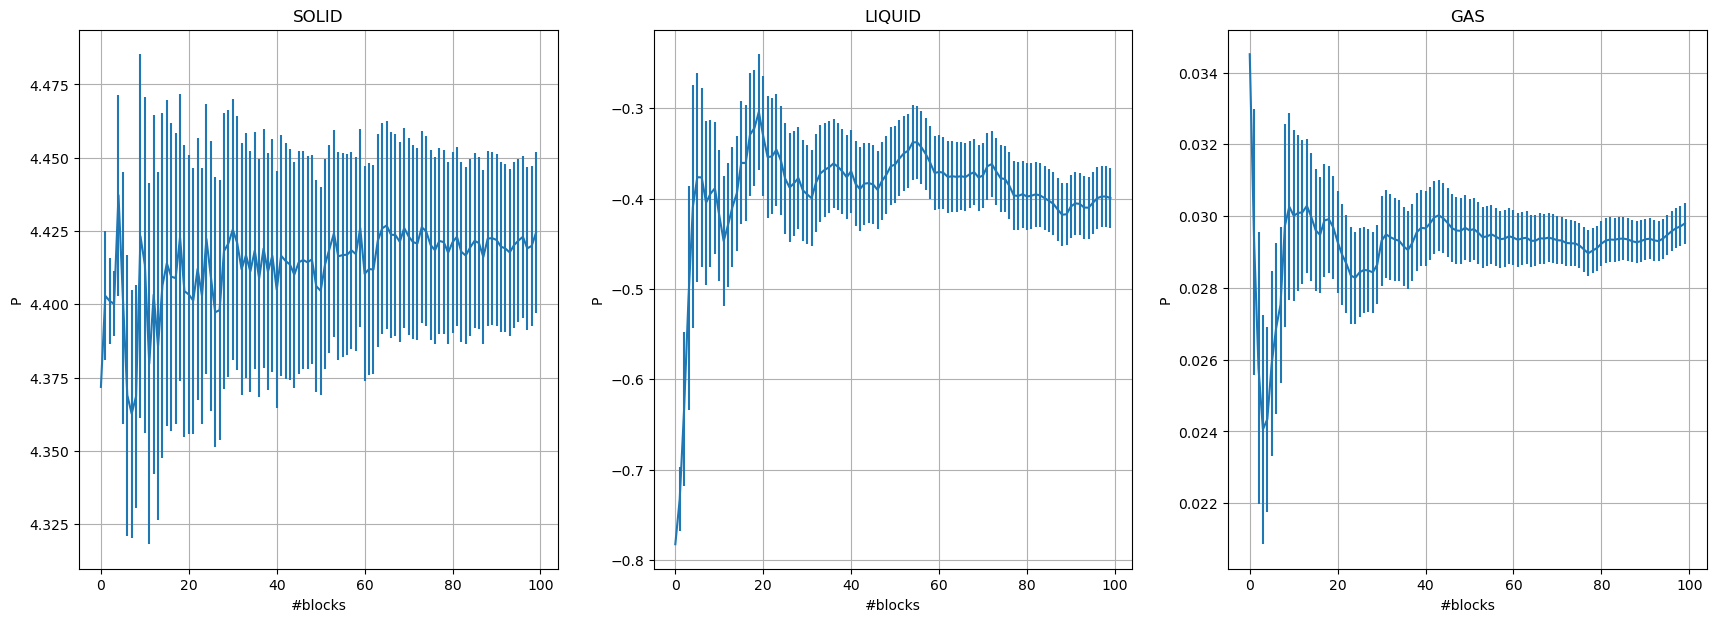

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv

fig1, te = plt.subplots(1, 3, figsize=(21, 7))
fig2, pe = plt.subplots(1, 3, figsize=(21, 7))
fig3, ke = plt.subplots(1, 3, figsize=(21, 7))
fig4, tm = plt.subplots(1, 3, figsize=(21, 7))
fig5, pr = plt.subplots(1, 3, figsize=(21, 7))

sim = ["SOLID","LIQUID","GAS"]

for i in range(3):
    mean = []
    sigma = []
    with open('results/'+sim[i]+"/total_energy.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    te[i].errorbar(range(len(mean)), mean,yerr=sigma)
    te[i].set_xlabel('#blocks')
    te[i].set_ylabel('E/N')
    te[i].set_title(sim[i])
    te[i].grid(True)

for i in range(3):
    mean = []
    sigma = []
    with open('results/'+sim[i]+"/potential_energy.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    pe[i].errorbar(range(len(mean)), mean,yerr=sigma)
    pe[i].set_xlabel('#blocks')
    pe[i].set_ylabel('U/N')
    pe[i].set_title(sim[i])
    pe[i].grid(True)

for i in range(3):
    mean = []
    sigma = []
    with open('results/'+sim[i]+"/kinetic_energy.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    ke[i].errorbar(range(len(mean)), mean,yerr=sigma)
    ke[i].set_xlabel('#blocks')
    ke[i].set_ylabel('K/N')
    ke[i].set_title(sim[i])
    ke[i].grid(True)

for i in range(3):
    mean = []
    sigma = []
    with open('results/'+sim[i]+"/temperature.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    tm[i].errorbar(range(len(mean)), mean,yerr=sigma)
    tm[i].set_xlabel('#blocks')
    tm[i].set_ylabel('T')
    tm[i].set_title(sim[i])
    tm[i].grid(True)
    if i == 0:
        tm[i].axhline(y=0.8, color='r', linestyle='--')
    elif i == 1:
        tm[i].axhline(y=1.1, color='r', linestyle='--')
    elif i == 2:
        tm[i].axhline(y=1.2, color='r', linestyle='--')
        

for i in range(3):
    mean = []
    sigma = []
    with open('results/'+sim[i]+"/pressure.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    pr[i].errorbar(range(len(mean)), mean,yerr=sigma)
    pr[i].set_xlabel('#blocks')
    pr[i].set_ylabel('P')
    pr[i].set_title(sim[i])
    pr[i].grid(True)

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

#### Termalization

To termalize the system we study the instantaneous evolution of the temperature. For this purpose we perform simulations with $1$ step within each block and, by trial and error, we find the optimal starting value of $T$ needed to equilibrate our system after a certain number of steps.

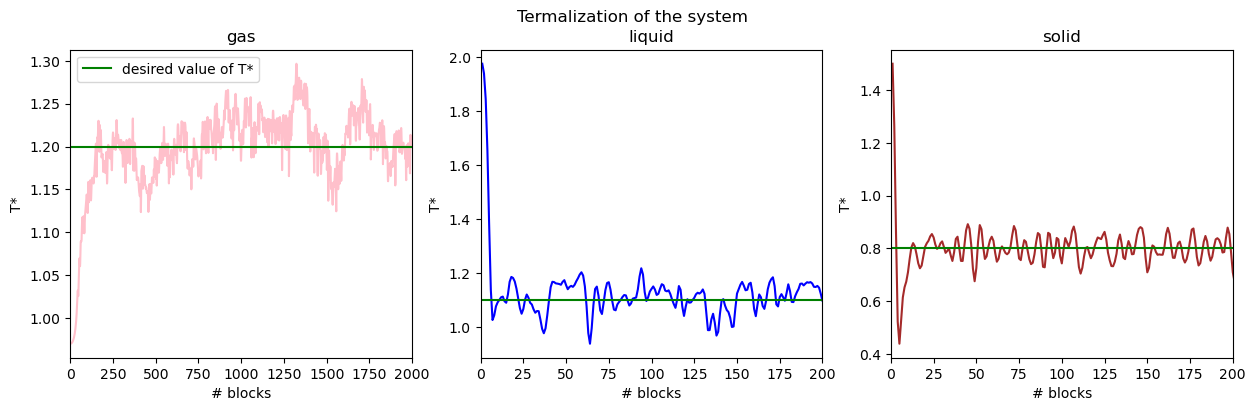

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv

fig1, te = plt.subplots(1, 3, figsize=(21, 7))
fig2, pe = plt.subplots(1, 3, figsize=(21, 7))
fig3, ke = plt.subplots(1, 3, figsize=(21, 7))
fig4, tm = plt.subplots(1, 3, figsize=(21, 7))
fig5, pr = plt.subplots(1, 3, figsize=(21, 7))

sim = ["SOLID","LIQUID","GAS"]

for i in range(3):
    mean = []
    sigma = []
    with open('results/'+sim[i]+"/temperature.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    tm[i].errorbar(range(len(mean)), mean,yerr=sigma)
    tm[i].set_xlabel('#blocks')
    tm[i].set_ylabel('T')
    tm[i].set_title(sim[i]+" - Tempertaure")
    tm[i].grid(True)
    if i == 0:
        tm[i].axhline(y=0.8, color='r', linestyle='--')
    elif i == 1:
        tm[i].axhline(y=1.1, color='r', linestyle='--')
    elif i == 2:
        tm[i].axhline(y=1.2, color='r', linestyle='--')

for i in range(3):
    mean = []
    sigma = []
    with open('results/'+sim[i]+"/total_energy.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    te[i].errorbar(range(len(mean)), mean,yerr=sigma)
    te[i].set_xlabel('# blocks')
    te[i].set_ylabel('E/N')
    te[i].set_title(sim[i]+" - Total Energy")
    te[i].grid(True)

for i in range(3):
    mean = []
    sigma = []
    with open('results/'+sim[i]+"/potential_energy.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    pe[i].errorbar(range(len(mean)), mean,yerr=sigma)
    pe[i].set_xlabel('# blocks')
    pe[i].set_ylabel('U/N')
    pe[i].set_title(sim[i]+" - Potential Energy")
    pe[i].grid(True)

for i in range(3):
    mean = []
    sigma = []
    with open('results/'+sim[i]+"/kinetic_energy.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    ke[i].errorbar(range(len(mean)), mean,yerr=sigma)
    ke[i].set_xlabel('# blocks')
    ke[i].set_ylabel('K/N')
    ke[i].set_title(sim[i]+" - Kinetic Energy")
    ke[i].grid(True)
        

for i in range(3):
    mean = []
    sigma = []
    with open('results/'+sim[i]+"/pressure.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    pr[i].errorbar(range(len(mean)), mean,yerr=sigma)
    pr[i].set_xlabel('# blocks')
    pr[i].set_ylabel('P')
    pr[i].set_title(sim[i]+" - Pressure")
    pr[i].grid(True)